In [1]:
# Imports
import datetime # tratar dados
import numpy as np # manipula em formato de matriz
import pandas as pd # manipula em formato de tabela
import seaborn as sns # graficos estatisticos
import matplotlib.pyplot as plt # graficos genéricos
from matplotlib import style # graficos genéricos
import warnings # para não poluir
warnings.filterwarnings('ignore')

In [2]:
# Carrega o dataset
df_covid = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')

In [3]:
# Shape
df_covid.shape

(30842, 26)

In [4]:
# Amostra dos dados
df_covid.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Info
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30842 entries, 0 to 30841
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   epi_week                               30842 non-null  int64  
 1   date                                   30842 non-null  object 
 2   country                                30842 non-null  object 
 3   state                                  30842 non-null  object 
 4   city                                   30842 non-null  object 
 5   newDeaths                              30842 non-null  int64  
 6   deaths                                 30842 non-null  int64  
 7   newCases                               30842 non-null  int64  
 8   totalCases                             30842 non-null  int64  
 9   deathsMS                               30842 non-null  int64  
 10  totalCasesMS                           30842 non-null  int64  
 11  de

In [6]:
# Função para formatar os eixos de um gráfico (ax) com opção para borda direita
def covid_format_spines(ax, right_border = True):

    # Define a cor da borda inferior
    ax.spines['bottom'].set_color('#000000')

    # Define a cor da borda esquerda
    ax.spines['left'].set_color('#000000')

    # Torna a borda superior invisível
    ax.spines['top'].set_visible(False)

    # Verifica se a borda direita deve ser visível
    if right_border:

        # Se sim, define a cor da borda direita como branco
        ax.spines['right'].set_color('#FFFFFF')

    else:

        # Se não, também define a cor da borda direita como branco
        ax.spines['right'].set_color('#FFFFFF')

    # Define a cor de fundo do gráfico como branco
    ax.patch.set_facecolor('#FFFFFF')

In [7]:
# Define uma função para criar um gráfico de contagem (count plot)
def covid_count_plot(feature, df, colors = 'Reds', hue = False, ax = None, title = ''):

    # Inicializa uma variável com o número total de entradas no dataframe
    ncount = len(df)

    # Cria um gráfico de contagem com ou sem uma variável de agrupamento (hue)
    if hue != False:
        ax = sns.countplot(x = feature, data = df, palette = colors, hue = hue, ax = ax)
    else:
        ax = sns.countplot(x = feature, data = df, palette = colors, ax = ax)

    # Chama a função para formatar as bordas do gráfico
    covid_format_spines(ax)

    # Calcula e anota (imprime no gráfico) a porcentagem de cada barra no gráfico
    for p in ax.patches:

        # Obtém as coordenadas x do retângulo da barra
        x = p.get_bbox().get_points()[:,0]

        # Obtém a coordenada y do topo do retângulo da barra
        y = p.get_bbox().get_points()[1,1]

        # Anota a porcentagem acima da barra
        ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y), ha = 'center', va = 'bottom')

    # Define o título do gráfico com base na presença ou ausência da variável de agrupamento (hue)
    if not hue:

        # Sem variável de agrupamento
        ax.set_title(df[feature].describe().name + ' Análise', size = 13, pad = 15)

    else:

        # Com variável de agrupamento
        ax.set_title(df[feature].describe().name + ' Analisado Por ' + hue, size = 13, pad = 15)

    # Se um título personalizado foi fornecido, ele é definido aqui
    if title != '':
        ax.set_title(title)

    # Ajusta o layout do gráfico para evitar sobreposições de elementos gráficos
    plt.tight_layout()

In [8]:
# Define uma função para criar um gráfico de barras
def covid_bar_plot(x, y, df, colors = 'YlOrBr', hue = False, ax = None, value = False, title = ''):

    # Tenta calcular o total da variável y, se falhar, calcula o total da variável x
    try:

        # Calcula o total dos valores da coluna y
        ncount = sum(df[y])

    except:

        # Calcula o total dos valores da coluna x em caso de erro com y
        ncount = sum(df[x])

    # Cria um gráfico de barras com ou sem uma variável de agrupamento (hue)
    if hue != False:

        # Com variável de agrupamento
        ax = sns.barplot(x = x, y = y, data = df, palette = colors, hue = hue, ax = ax, ci = None)

    else:

        # Sem variável de agrupamento
        ax = sns.barplot(x = x, y = y, data = df, palette = colors, ax = ax, ci = None)

    # Chama a função para formatar as bordas do gráfico
    covid_format_spines(ax)

    # Anota o valor ou a porcentagem sobre cada barra no gráfico
    for p in ax.patches:

        # Obtém as coordenadas x do retângulo da barra
        xp = p.get_bbox().get_points()[:,0]

        # Obtém a coordenada y do topo do retângulo da barra
        yp = p.get_bbox().get_points()[1,1]

        # Se verdadeiro
        if value:

            # Anota o valor em milhares se value=True
            ax.annotate('{:.2f}k'.format(yp / 1000), (xp.mean(), yp), ha = 'center', va = 'bottom')

        else:

            # Anota a porcentagem se value=False
            ax.annotate('{:.1f}%'.format(100. * yp / ncount), (xp.mean(), yp), ha = 'center', va = 'bottom')

    # Define o título do gráfico com base na presença ou ausência da variável de agrupamento (hue)
    if not hue:

        # Sem variável de agrupamento
        ax.set_title(df[x].describe().name + ' Análise', size = 12, pad = 15)

    else:

        # Com variável de agrupamento
        ax.set_title(df[x].describe().name + ' Analisado Por ' + hue, size = 12, pad = 15)

    # Se um título personalizado foi fornecido, ele é definido aqui
    if title != '':

        # Define o título personalizado
        ax.set_title(title)

    # Ajusta o layout do gráfico para evitar sobreposições de elementos gráficos
    plt.tight_layout()

Evolução de Casos ao Longo do Tempo

In [9]:
# Copia o dataset
df = df_covid.copy()

In [10]:
# Colunas
df.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'],
      dtype='object')

In [11]:

# Converter o campo de data para datetime:
df['date_dt'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Extrair o ano da data:
df['ano'] = df['date_dt'].dt.year

# Ordena
df['ano'].value_counts().sort_index()


ano
2020     8246
2021    10220
2022    10220
2023     2156
Name: count, dtype: int64

In [12]:
# Cria datasets para cada ano
df_2020 = df.query('ano=="2020"')
df_2021 = df.query('ano=="2021"')
df_2022 = df.query('ano=="2022"')
df_2023 = df.query('ano=="2023"')

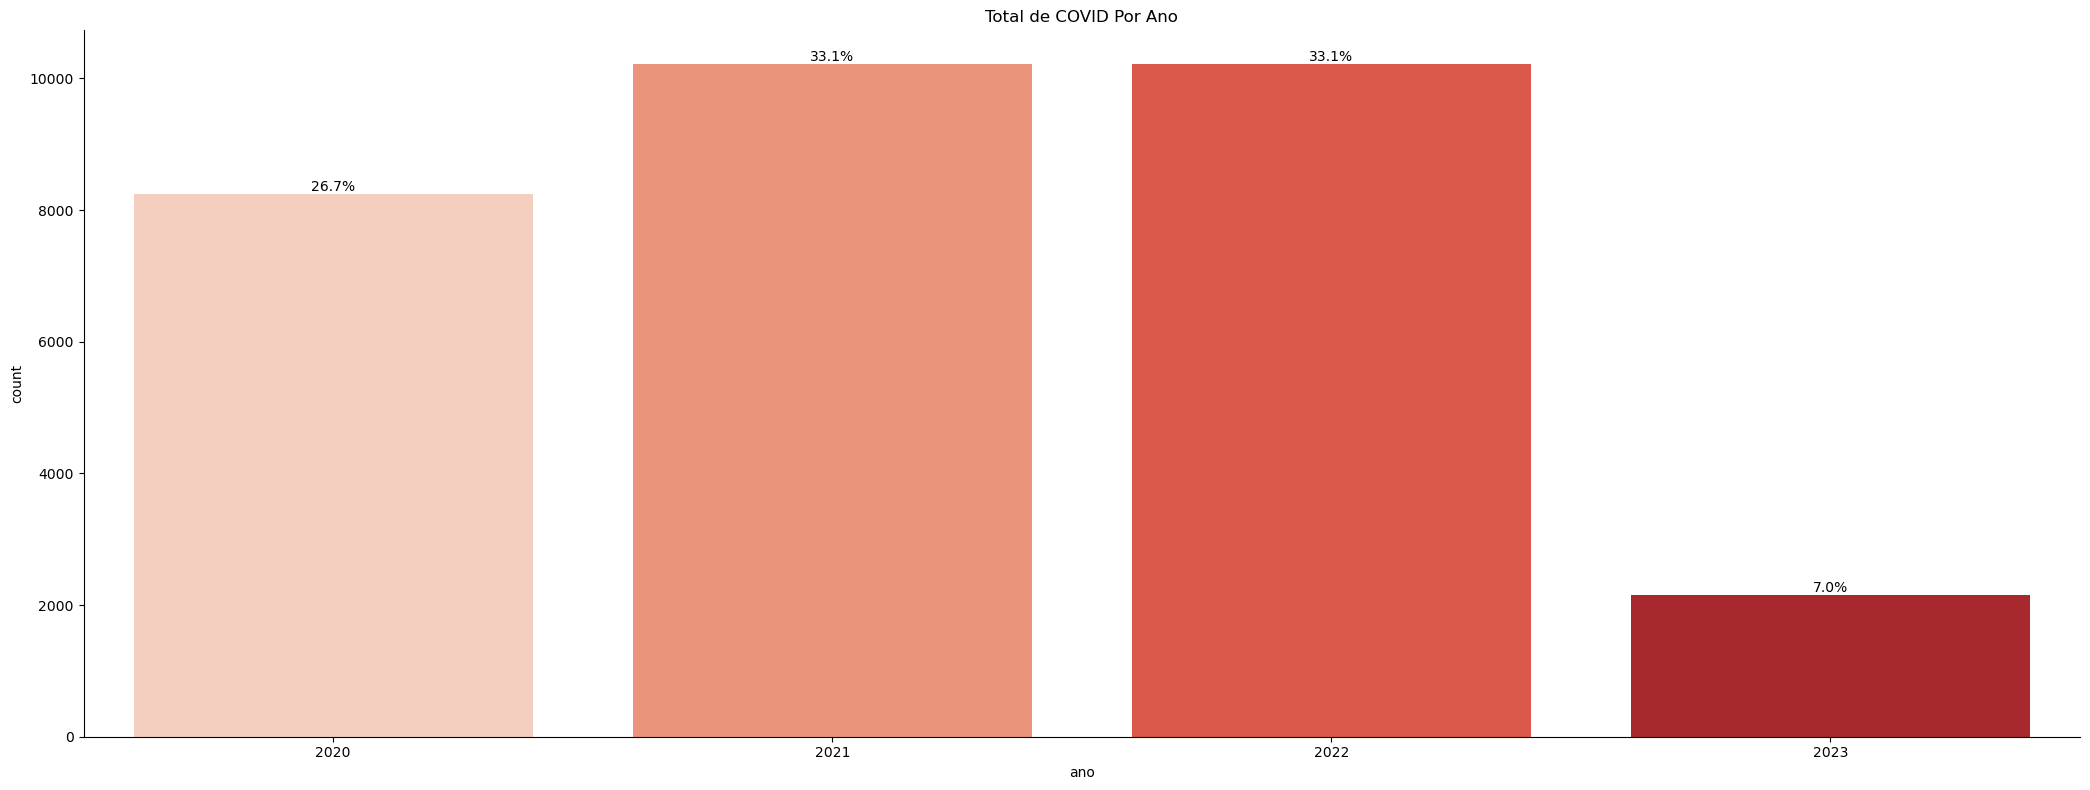

In [13]:
# Total de casos de COVID Por Ano
fig, axs = plt.subplots(1, 1, figsize = (21, 8))
covid_count_plot(feature = 'ano',
               df = df,
               ax = axs,
               title = 'Total de COVID Por Ano')
plt.show();


Casos Por Mês/Ano

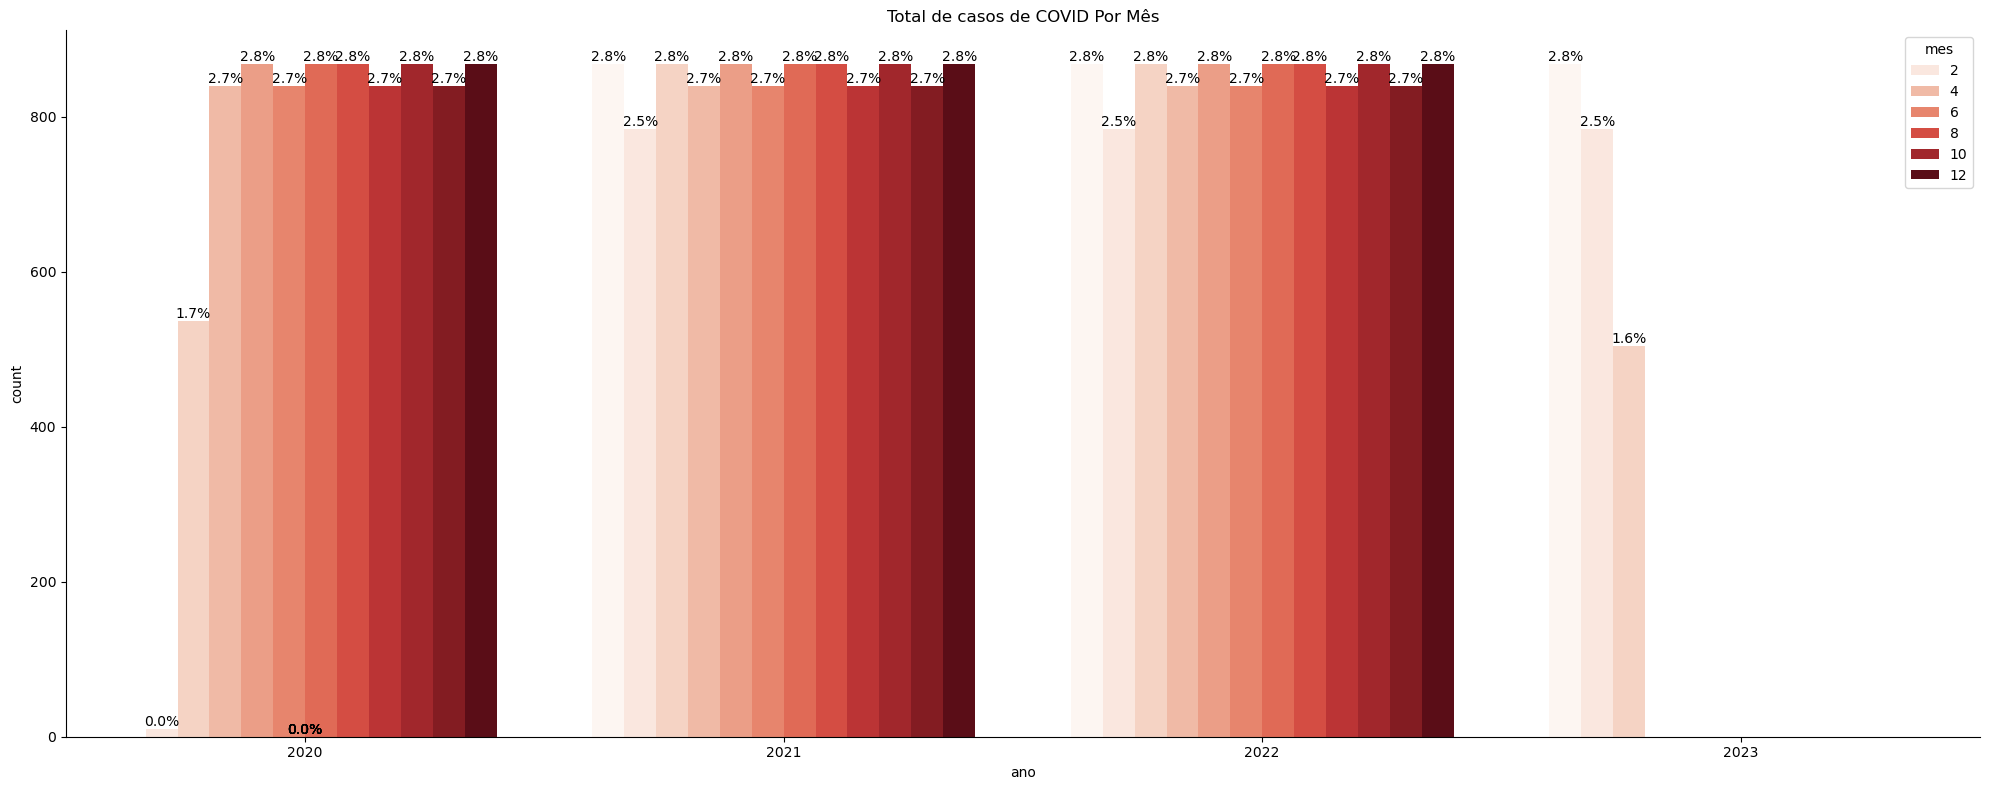

In [14]:
# Extrair o ano da data:
df['mes'] = df['date_dt'].dt.month

# Total de casos de COVID Por Mês e Por Ano
fig, axs = plt.subplots(1, 1, figsize = (20, 8))
covid_count_plot(feature = 'ano',
               df = df,
               ax = axs,
               hue = 'mes',
               title = 'Total de casos de COVID Por Mês')
plt.show();

Casos Por Dia da Semana

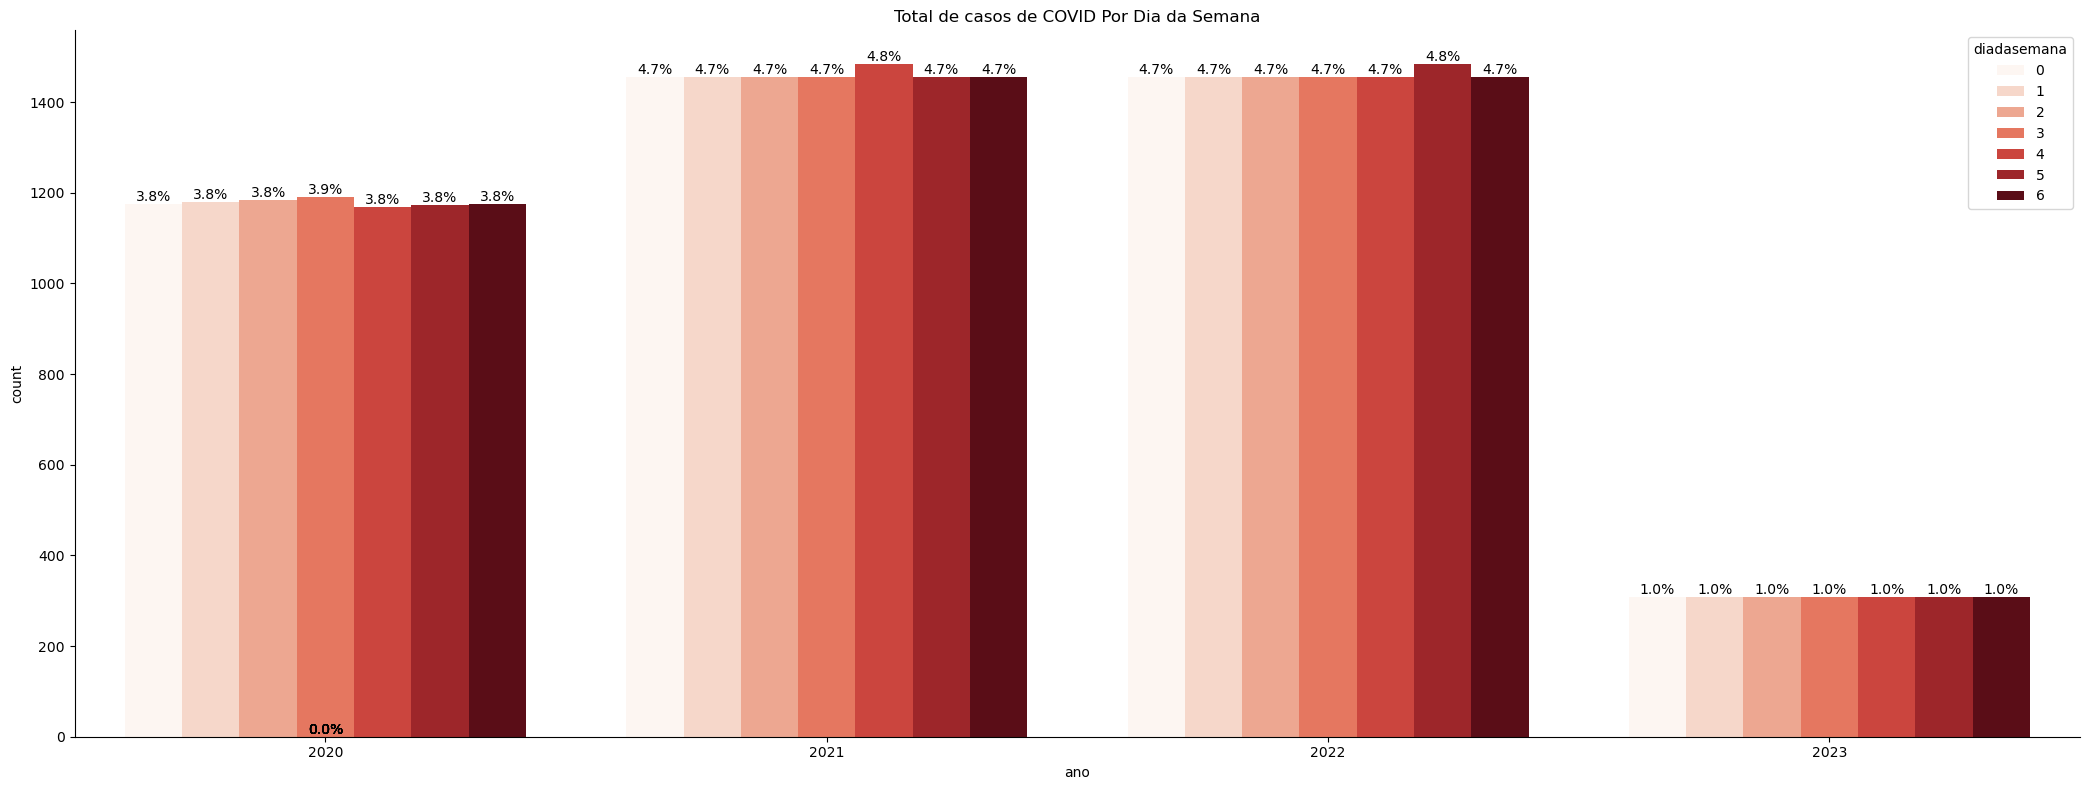

In [15]:
# Extrair o dia da semana:
df['diadasemana'] = df['date_dt'].dt.day_of_week

# Total de Casos de COVID Por Dia da Semana em Cada Ano
fig, axs = plt.subplots(1, 1, figsize = (21, 8))
covid_count_plot(feature = 'ano',
               df = df,
               ax = axs,
               hue = 'diadasemana',
               title = 'Total de casos de COVID Por Dia da Semana')
plt.show();